# Data Analytics for Diabetic Retinopathy Dataset

## Initialization

In [1]:
# from google.colab import drive

# # Connect to the google drive
# drive.mount('/content/gdrive')

In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

___
## Loading Data

In [3]:
# !pip install matplotlib

In [4]:
data =  arff.loadarff("messidor_features.arff")
df = pd.DataFrame(data).transpose()
display(df.head()) 

,0,1
0,"[1.0, 1.0, 22.0, 22.0, 22.0, 19.0, 18.0, 14.0,...",0
1,"[1.0, 1.0, 24.0, 24.0, 22.0, 18.0, 16.0, 13.0,...",1
2,"[1.0, 1.0, 62.0, 60.0, 59.0, 54.0, 47.0, 33.0,...",2
3,"[1.0, 1.0, 55.0, 53.0, 53.0, 50.0, 43.0, 31.0,...",3
4,"[1.0, 1.0, 44.0, 44.0, 44.0, 41.0, 39.0, 27.0,...",4


In [5]:
df = pd.DataFrame(data[0])
df.columns = ["q", "ps", "nma.a", "nma.b", "nma.c", "nma.d", "nma.e", "nma.f",
             "nex.a", "nex.b", "nex.c", "nex.d", "nex.e", "nex.g", "nex.f",
             "nex.h", "dd", "dm", "amfm", "class"]

size = df.shape[0]
for i in range(size):
    df['class'].replace(i, df['class'][i])

display(df.head())

,q,ps,nma.a,nma.b,nma.c,nma.d,nma.e,nma.f,nex.a,nex.b,nex.c,nex.d,nex.e,nex.g,nex.f,nex.h,dd,dm,amfm,class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [6]:
df.describe()

,q,ps,nma.a,nma.b,nma.c,nma.d,nma.e,nma.f,nex.a,nex.b,nex.c,nex.d,nex.e,nex.g,nex.f,nex.h,dd,dm,amfm
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000


In [7]:
my_list = []
for index, row in df.iterrows():
  my_list.append(int(row['class']))
df_1 = pd.concat([df, pd.Series(my_list)], axis=1)
c = df_1.columns=[name for name in df_1.columns]
c_1 = c[:len(c)-1]
c_1.append('golds')


df_1.columns = c_1
del df_1['class']

In [8]:
df_1.describe()

,q,ps,nma.a,nma.b,nma.c,nma.d,nma.e,nma.f,nex.a,nex.b,nex.c,nex.d,nex.e,nex.g,nex.f,nex.h,dd,dm,amfm,golds
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [9]:
print(df_1.columns)

Index(['q', 'ps', 'nma.a', 'nma.b', 'nma.c', 'nma.d', 'nma.e', 'nma.f',
       'nex.a', 'nex.b', 'nex.c', 'nex.d', 'nex.e', 'nex.g', 'nex.f', 'nex.h',
       'dd', 'dm', 'amfm', 'golds'],
      dtype='object')


In [10]:
c = df_1['golds'] == 1 
dd = df_1[c]
print(dd['dd'].mean())
print(dd['dd'].max())
print(dd['dd'].min())

0.5234354484451719
0.588851
0.367762


## Cleansing Data

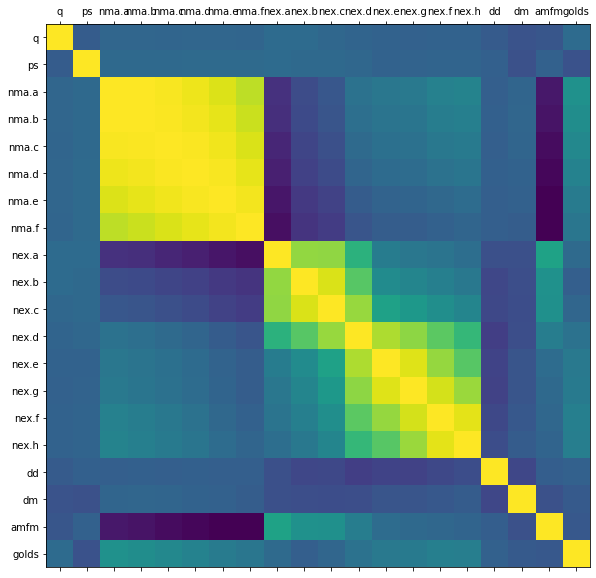

In [11]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(df_1, 10)

In [12]:
def find_outlier(df, col_name):
    plt.show()
    q3 = df[col_name].quantile(0.75)
    q1 = df[col_name].quantile(0.25)
    iqr = q3 - q1
    outliers =  (df[col_name] > (q3 + 1.5 * iqr)) | (df[col_name] < (q1 - 1.5 * iqr))
    return df[outliers]

In [13]:
def truncate(df, col_name):
    outlier = find_outlier(df, col_name)
    df_no_outlier = df_1[~df_1.isin(outlier)].dropna()
    max_ = df_no_outlier[col_name].max()
    outlier[col_name] = max_
    df_no_outlier = pd.concat([df_no_outlier, outlier], axis=0)
    df_no_outlier = df_no_outlier.sort_index()
    return df_no_outlier

### nma

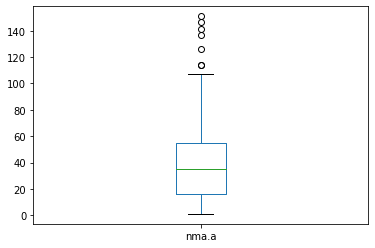

In [14]:
df_1[df_1.columns[2]].plot(kind='box')

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


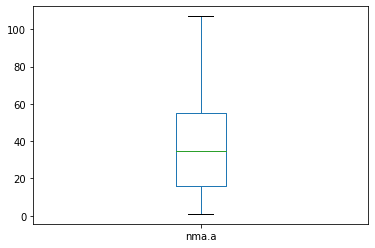

In [15]:
df_new = truncate(df_1, df_1.columns[2])
df_new[df_1.columns[2]].plot(kind='box')

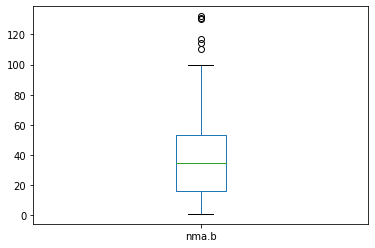

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


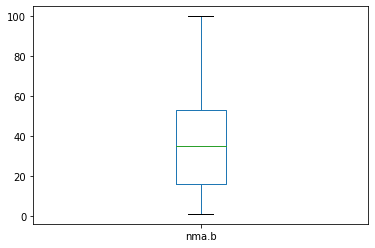

In [16]:
df_new[df_new.columns[3]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[3])
df_new[df_new.columns[3]].plot(kind='box')

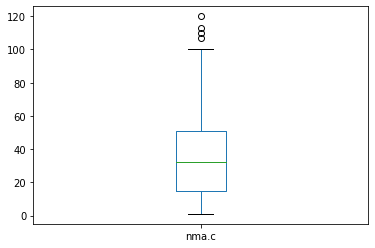

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


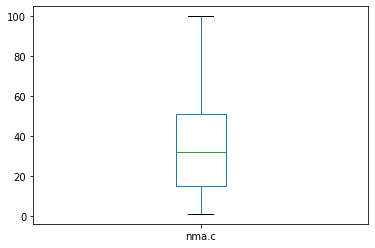

In [17]:
df_new[df_new.columns[4]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[4])
df_new[df_new.columns[4]].plot(kind='box')

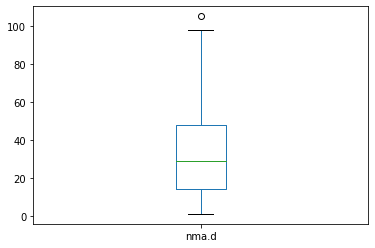

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


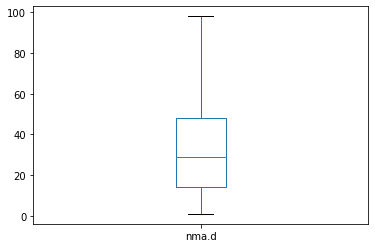

In [18]:
df_new[df_new.columns[5]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[5])
df_new[df_new.columns[5]].plot(kind='box')

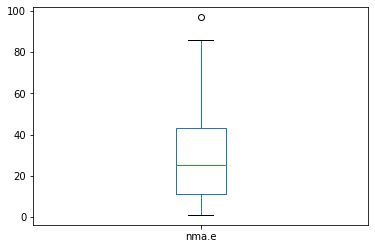

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


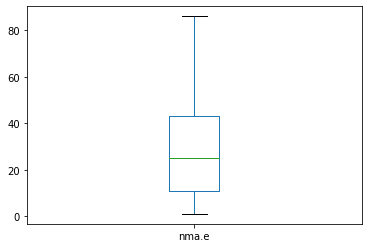

In [19]:
df_new[df_new.columns[6]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[6])
df_new[df_new.columns[6]].plot(kind='box')

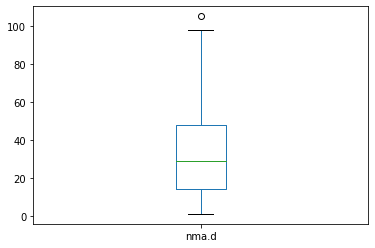

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


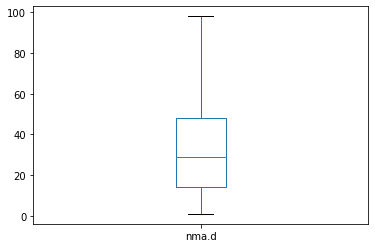

In [20]:
df_new[df_new.columns[5]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[5])
df_new[df_new.columns[5]].plot(kind='box')

### nex

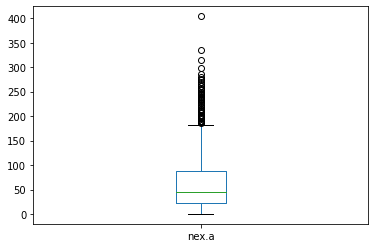

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


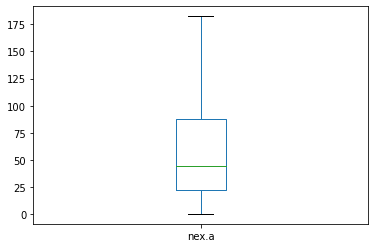

In [21]:
df_new[df_new.columns[8]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[8])
df_new[df_new.columns[8]].plot(kind='box')

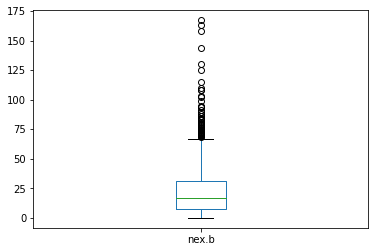

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


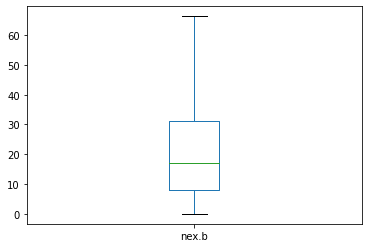

In [22]:
df_new[df_new.columns[9]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[9])
df_new[df_new.columns[9]].plot(kind='box')

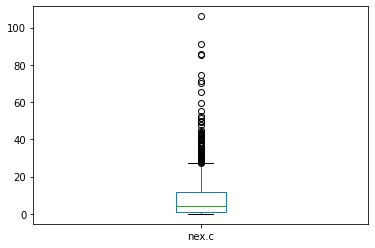

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


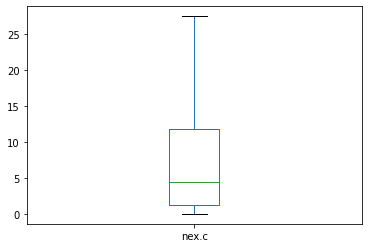

In [23]:
df_new[df_new.columns[10]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[10])
df_new[df_new.columns[10]].plot(kind='box')

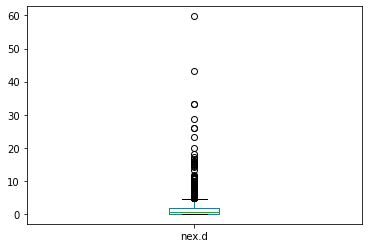

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


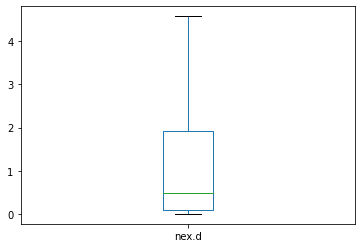

In [24]:
df_new[df_new.columns[11]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[11])
df_new[df_new.columns[11]].plot(kind='box')

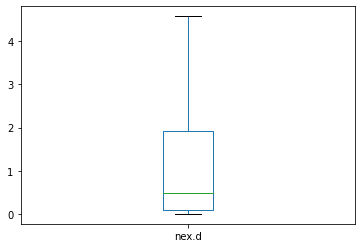

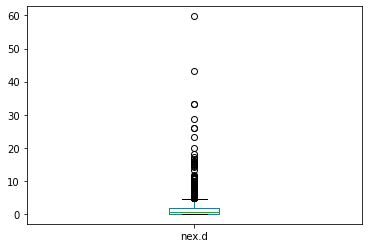

In [25]:
df_new[df_new.columns[11]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[11])
df_new[df_new.columns[11]].plot(kind='box')

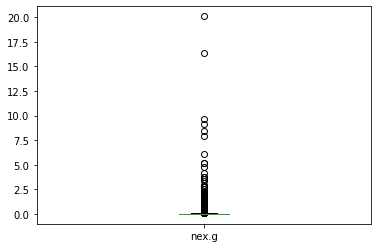

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


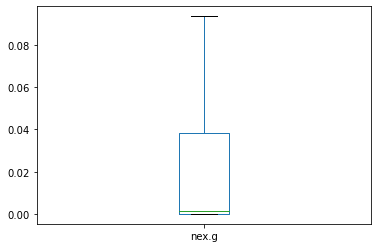

In [26]:
df_new[df_new.columns[13]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[13])
df_new[df_new.columns[13]].plot(kind='box')

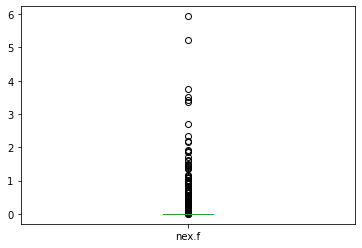

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


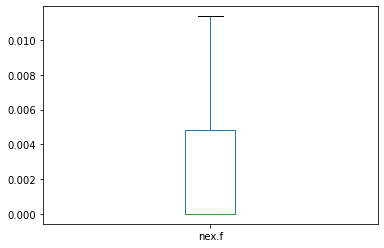

In [27]:
df_new[df_new.columns[14]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[14])
df_new[df_new.columns[14]].plot(kind='box')

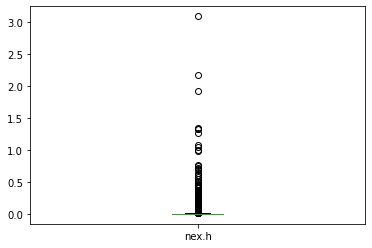

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


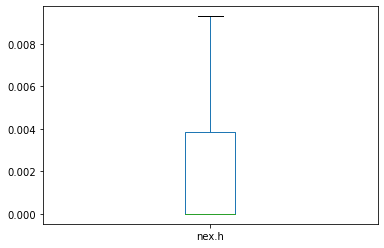

In [28]:
df_new[df_new.columns[15]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[15])
df_new[df_new.columns[15]].plot(kind='box')

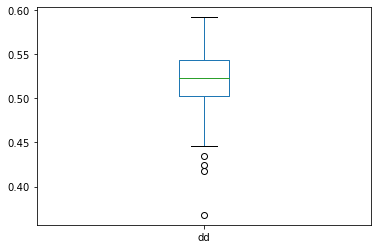

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


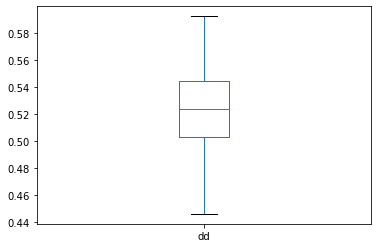

In [29]:
df_new[df_new.columns[16]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[16])
df_new[df_new.columns[16]].plot(kind='box')

In [30]:
c = df_new['golds'] == 0 
dd = df_new[c]
print(dd['dd'].mean())
print(dd['dd'].max())
print(dd['dd'].min())

c = df_new['golds'] == 1 
dd = df_new[c]
print(dd['dd'].mean())
print(dd['dd'].max())
print(dd['dd'].min())

0.523884375925926
0.592217
0.446304
0.5238028052373158
0.592217
0.44968


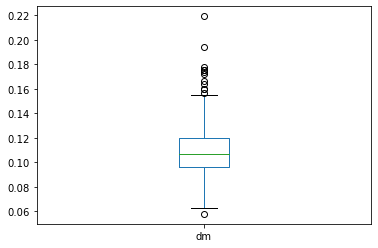

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


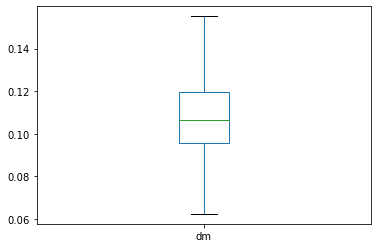

In [31]:
df_new[df_new.columns[17]].plot(kind='box')
df_new = truncate(df_new, df_new.columns[17])
df_new[df_new.columns[17]].plot(kind='box')

In [32]:
my_cri = df_new['q'] == 0
a = df_new.index[my_cri].tolist()
a
df_new1 = df_new.drop(a)
del df_new1['q']

In [33]:
df_new1.head()

,ps,nma.a,nma.b,nma.c,nma.d,nma.e,nma.f,nex.a,nex.b,nex.c,nex.d,nex.e,nex.g,nex.f,nex.h,dd,dm,amfm,golds
0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0.0
1,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0.0
2,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1.0
3,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0.0
4,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1.0


___
### Combining features

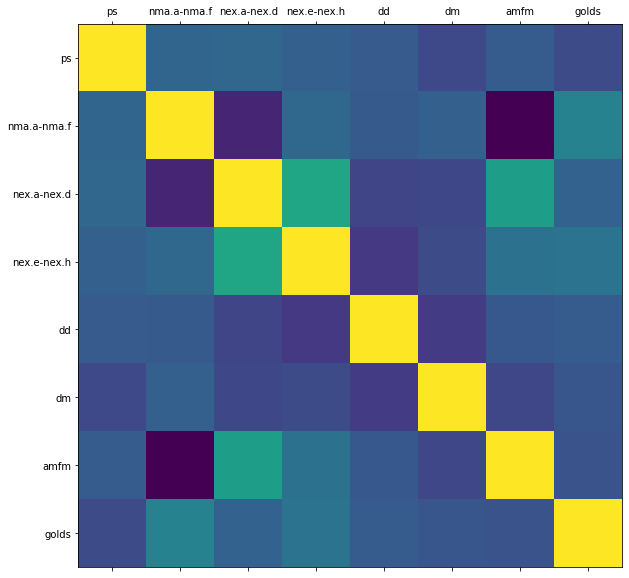

In [34]:
df_2 = pd.DataFrame()
# df_2['q'] = df_1['q']
df_2['ps'] = df_new1['ps']
df_2['nma.a-nma.f'] = df_new1[df_new1.columns[1:7]].mean(axis=1)
df_2['nex.a-nex.d'] = df_new1[df_new1.columns[7:10]].mean(axis=1)
df_2['nex.e-nex.h'] = df_new1[df_new1.columns[10:15]].mean(axis=1)
df_2['dd'] = df_new1['dd']
df_2['dm'] = df_new1['dm']
df_2['amfm'] = df_new1['amfm']
df_2['golds'] = df_new1['golds']
plot_corr(df_2, 10)

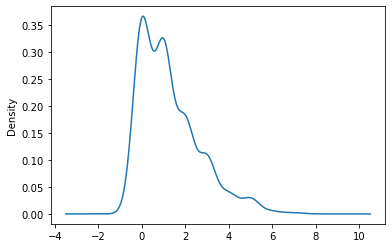

In [35]:
pd.crosstab(index=df_2['golds'],columns=df_2['nma.a-nma.f']).iloc[0].plot.kde()

In [36]:
!pip install seaborn

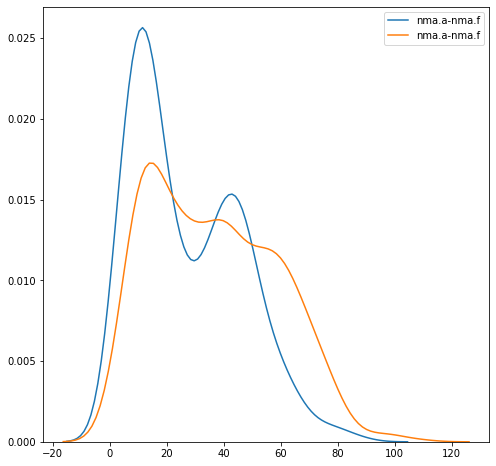

In [37]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(df_2[df_2['golds'] == 0]['nma.a-nma.f'])
ax = sns.kdeplot(df_2[df_2['golds'] == 1]['nma.a-nma.f'])

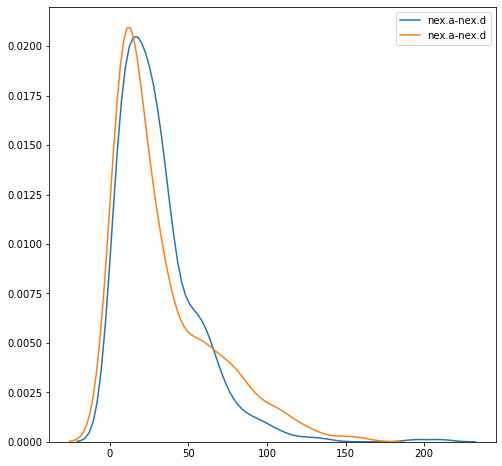

In [38]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(df_2[df_2['golds'] == 0]['nex.a-nex.d'])
ax = sns.kdeplot(df_2[df_2['golds'] == 1]['nex.a-nex.d'])

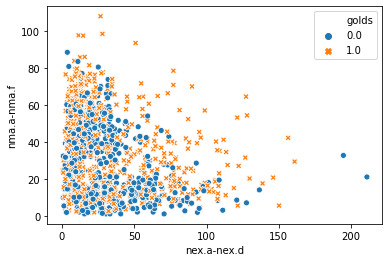

In [39]:
ax = sns.scatterplot(x='nex.a-nex.d', y='nma.a-nma.f',hue="golds",
                     style="golds", data=df_2)

**I would say that combining features doesn't imporve performance**

## Split Train and Test data

In [40]:
X = df_new1[[item for item in df_new1.columns if item != 'golds']]
y = df_new1['golds']

In [41]:
X.head(),y.head()

(    ps  nma.a  nma.b  nma.c  nma.d  nma.e  nma.f      nex.a      nex.b  \
 0  1.0   22.0   22.0   22.0   19.0   18.0   14.0  49.895756  17.775994   
 1  1.0   24.0   24.0   22.0   18.0   16.0   13.0  57.709936  23.799994   
 2  1.0   62.0   60.0   59.0   54.0   47.0   33.0  55.831441  27.993933   
 3  1.0   55.0   53.0   53.0   50.0   43.0   31.0  40.467228  18.445954   
 4  1.0   44.0   44.0   44.0   41.0   39.0   27.0  18.026254   8.570709   
 
        nex.c     nex.d     nex.e     nex.g     nex.f     nex.h        dd  \
 0   5.270920  0.771761  0.018632  0.006864  0.003923  0.003923  0.486903   
 1   3.325423  0.234185  0.003903  0.003903  0.003903  0.003903  0.520908   
 2  12.687485  4.852282  1.393889  0.373252  0.041817  0.007744  0.530904   
 3   9.118901  3.079428  0.840261  0.272434  0.007653  0.001531  0.483284   
 4   0.410381  0.000000  0.000000  0.000000  0.000000  0.000000  0.475935   
 
          dm  amfm  
 0  0.100025   1.0  
 1  0.144414   0.0  
 2  0.128548   0.0  


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train Model

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [44]:
ml_mean_list = []

___
### Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=4, scoring='f1_micro')
gnb_scores.mean()

0.5684437513705807

In [47]:
ml_mean_list.append(gnb_scores.mean())

___
### Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC(C=4, gamma='scale', kernel='poly', degree=4)
svm_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro')
svm_scores.mean()

0.6778530328608205

In [50]:
ml_mean_list.append(svm_scores.mean())

In [51]:
svm_ = SVC(C=4, gamma='scale', kernel='poly', degree=4)
svm_.fit(X_train,y_train)
svm_hat = svm_.predict(X_test)
print(classification_report(y_test,svm_hat))

              precision    recall  f1-score   support

         0.0       0.62      0.88      0.73       129
         1.0       0.85      0.56      0.67       158

    accuracy                           0.70       287
   macro avg       0.74      0.72      0.70       287
weighted avg       0.75      0.70      0.70       287



___
### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
randf = RandomForestClassifier(n_estimators=200)
randf_scores = cross_val_score(randf, X, y, cv=4, scoring='f1_micro')
randf_scores.mean()

0.664320435661899

In [54]:
ml_mean_list.append(randf_scores.mean())

___
### Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc = GradientBoostingClassifier()
gbc_scores = cross_val_score(gbc, X, y, cv=4, scoring='f1_micro')
gbc_scores.mean()

0.6922041373260887

In [57]:
ml_mean_list.append(gbc_scores.mean())

___
### Decision Tree

In [58]:
from sklearn import tree

In [59]:
dt = tree.DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X, y, cv=4, scoring='f1_micro')
dt_scores.mean()                  

0.6398875514729173

In [60]:
ml_mean_list.append(dt_scores.mean())

___
### Bernoulli Naive Bayes

In [61]:
from sklearn.naive_bayes import BernoulliNB

In [62]:
bnb = BernoulliNB()
bnb_scores = cross_val_score(bnb, X, y, cv=4, scoring='f1_micro')
bnb_scores.mean()         

0.5675604882921956

In [63]:
ml_mean_list.append(bnb_scores.mean())

___
### Multinomial Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
mnb = MultinomialNB()
mnb_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_micro')
mnb_scores.mean()         

0.574568723958968

In [66]:
ml_mean_list.append(mnb_scores.mean())

___
### Complement Naive Bayes

In [67]:
from sklearn.naive_bayes import ComplementNB

In [68]:
cnb = ComplementNB()
cnb_scores = cross_val_score(cnb, X, y, cv=4, scoring='f1_micro')
cnb_scores.mean()         

0.5763108842377135

In [69]:
ml_mean_list.append(cnb_scores.mean())

___
### Multilayer perceptron

In [70]:
from sklearn.neural_network import MLPClassifier

In [71]:
mlp = MLPClassifier(activation='tanh',max_iter=1000)
mlp.fit(X_train,y_train)
y_hat_mlp = mlp.predict(X_test)
print(classification_report(y_test,y_hat_mlp))

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       129
         1.0       0.80      0.77      0.78       158

    accuracy                           0.77       287
   macro avg       0.76      0.77      0.76       287
weighted avg       0.77      0.77      0.77       287



In [72]:
mlp_ = MLPClassifier(activation='tanh', max_iter=500)
mlp_scores = cross_val_score(mlp_, X, y, cv=4, scoring='f1_micro')
mlp_scores.mean()

0.7576326112911477

In [73]:
ml_mean_list.append(mlp_scores.mean())

___
### Ada Boost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_hat = ada.predict(X_test)
print(classification_report(y_test, ada_hat))

              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68       129
         1.0       0.74      0.70      0.72       158

    accuracy                           0.70       287
   macro avg       0.70      0.70      0.70       287
weighted avg       0.70      0.70      0.70       287



In [76]:
ada_ = AdaBoostClassifier()
ada_scores = cross_val_score(ada_, X, y, cv=4, scoring='f1_micro')
ada_scores.mean()

0.6756231573304744

In [77]:
ml_mean_list.append(ada_scores.mean())

___
### Bagging

In [78]:
from sklearn.ensemble import BaggingClassifier

In [79]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
bag_hat = bag.predict(X_test)
print(classification_report(y_test, bag_hat))

              precision    recall  f1-score   support

         0.0       0.61      0.72      0.66       129
         1.0       0.73      0.63      0.68       158

    accuracy                           0.67       287
   macro avg       0.67      0.67      0.67       287
weighted avg       0.68      0.67      0.67       287



In [80]:
bag_ = BaggingClassifier()
bag_scores = cross_val_score(bag_, X, y, cv=4, scoring='f1_micro')
bag_scores.mean()

0.6608178406958894

In [81]:
ml_mean_list.append(bag_scores.mean())

___
### Extra Trees

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
xtree = ExtraTreesClassifier(n_estimators=100)
xtree.fit(X_train, y_train)
xtree_hat = xtree.predict(X_test)
print(classification_report(y_test, xtree_hat))

              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66       129
         1.0       0.73      0.72      0.72       158

    accuracy                           0.70       287
   macro avg       0.69      0.69      0.69       287
weighted avg       0.70      0.70      0.70       287



In [84]:
xtree_ = ExtraTreesClassifier(n_estimators=100)
xtree_scores = cross_val_score(xtree_, X, y, cv=4, scoring='f1_micro')
xtree_scores.mean()

0.6800211983138813

In [85]:
ml_mean_list.append(xtree_scores.mean())

___
### Finding Out The Best Machine Learning

In [86]:
ml_names = ['gnb', 'svm', 'randf', 'gbc', 'dt', 'bnb',
           'mnb', 'cnb', 'mlp', 'ada', 'bag', 'xtree']

In [87]:
ml_best = []
for i in range(len(ml_names)):
    arr = {}
    arr['ml_name'] = ml_names[i]
    arr['mean'] = ml_mean_list[i]
    ml_best.append(arr)

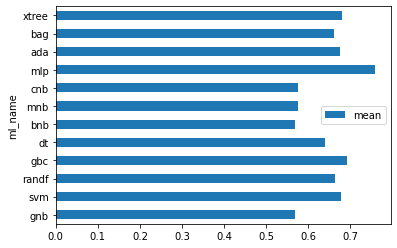

In [88]:
ml_best_df = pd.DataFrame(ml_best)
ml_best_df.plot(kind='barh',x='ml_name',y='mean')

___
## Feature Extraction


### Feature Extraction From Random Forest

In [89]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
rand_f1_list = []
rand_impt_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    randf_ = RandomForestClassifier(n_estimators=200)
    randf_.fit(X_train,y_train)
    y_pred = randf_.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    rand_f1_list.append(f1)
    impt = randf_.feature_importances_
    rand_impt_list.append(impt)

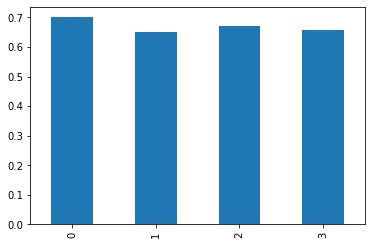

In [90]:
pd.Series(rand_f1_list).plot(kind='bar')

In [91]:
def getKey(elem):
    return elem['feature_importances_mean']

my_dataframe = pd.DataFrame(rand_impt_list)
my_list = []

for i in range(len(X.columns)):
    arr = {}
    arr['index'] = X.columns[i]
    arr['feature_importances_mean'] = my_dataframe[i].mean()
    my_list.append(arr)
    
randf_sorted_my_list = sorted(my_list, key=getKey, reverse=True)
randf_sorted_my_list

[{'index': 'nex.a', 'feature_importances_mean': 0.08843513458163771},
 {'index': 'nma.a', 'feature_importances_mean': 0.08746172496465465},
 {'index': 'nex.b', 'feature_importances_mean': 0.07100034460866408},
 {'index': 'dd', 'feature_importances_mean': 0.0681868978552432},
 {'index': 'dm', 'feature_importances_mean': 0.0676383663267614},
 {'index': 'nex.c', 'feature_importances_mean': 0.06759929138205488},
 {'index': 'nma.b', 'feature_importances_mean': 0.06392761240895149},
 {'index': 'nex.d', 'feature_importances_mean': 0.06389630614423125},
 {'index': 'nex.f', 'feature_importances_mean': 0.05711156233314627},
 {'index': 'nma.c', 'feature_importances_mean': 0.05647824470790232},
 {'index': 'nma.f', 'feature_importances_mean': 0.05550494222939748},
 {'index': 'nma.e', 'feature_importances_mean': 0.05465491280828952},
 {'index': 'nma.d', 'feature_importances_mean': 0.0515100089176008},
 {'index': 'nex.e', 'feature_importances_mean': 0.0462855027311721},
 {'index': 'nex.h', 'feature_i

In [92]:
#randf
sig_col = []
for i in range(len(randf_sorted_my_list)):
    sig_col.append(randf_sorted_my_list[i]['index'])
size = len(sig_col)

In [93]:
sig =[]
for i in range(1,size+1,1):
    X_sig = X[sig_col[:i]]
    mlp_sig = MLPClassifier(activation='tanh', max_iter=500, solver='adam')
    mlp_scores = cross_val_score(mlp_sig, X_sig, y, cv=4, scoring='f1_micro')
    sig.append(mlp_scores.mean())

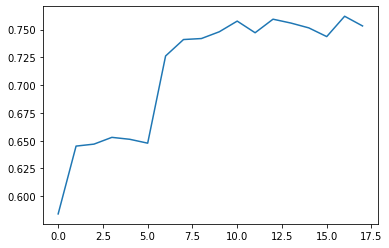

In [94]:
pd.Series(sig).plot()

In [182]:
for i in range(len(sig)):
    if sig[i] == max(sig):
        pointer = " <-- max value"
    else:
        pointer = ""
    print(str(i) + ': ' + str(sig[i]) + pointer)

0: 0.5841018737360202
1: 0.6451383981871787
2: 0.6469140615482079
3: 0.6530055310543116
4: 0.6512603250408129
5: 0.6477699130138155
6: 0.7262432689261957
7: 0.7410424940912745
8: 0.7419379401086719
9: 0.7480385468190346
10: 0.7576326112911479
11: 0.7471522380058966
12: 0.7593504056918691
13: 0.7558752223386369
14: 0.7515259131112789
15: 0.7436892375916766
16: 0.7620062863965303 <-- max value
17: 0.7532741648595307


In [96]:
len(sig_col[:10])
sig_col[:10]

['nex.a',
 'nma.a',
 'nex.b',
 'dd',
 'dm',
 'nex.c',
 'nma.b',
 'nex.d',
 'nex.f',
 'nma.c']

In [97]:
X_sig = X[sig_col]
mlp_sig = MLPClassifier(activation='tanh', max_iter=500, solver='adam')
mlp_scores = cross_val_score(mlp_sig, X_sig, y, cv=4, scoring='f1_micro')
print(mlp_scores.mean())

0.7480385468190347


___
### Feature Extraction From Gradient Boosting Classifier

In [98]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

gbc_f1_list = []
gbc_impt_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gbc_ = GradientBoostingClassifier()
    gbc_.fit(X_train,y_train)
    y_pred = gbc_.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    gbc_f1_list.append(f1)
    impt = gbc_.feature_importances_
    gbc_impt_list.append(impt)

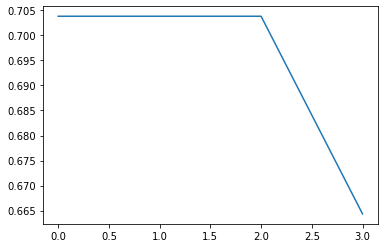

In [99]:
pd.Series(gbc_f1_list).plot()

In [100]:
def getKey(elem):
    return elem['feature_importances_mean']

my_dataframe = pd.DataFrame(gbc_impt_list)
my_list = []

for i in range(len(X.columns)):
    arr = {}
    arr['index'] = X.columns[i]
    arr['feature_importances_mean'] = my_dataframe[i].mean()
    my_list.append(arr)
    
gbc_sorted_my_list = sorted(my_list, key=getKey, reverse=True)
gbc_sorted_my_list

[{'index': 'nma.a', 'feature_importances_mean': 0.2160449170318218},
 {'index': 'nex.f', 'feature_importances_mean': 0.1492369317804715},
 {'index': 'nex.a', 'feature_importances_mean': 0.10324554982157048},
 {'index': 'dd', 'feature_importances_mean': 0.0717970037511176},
 {'index': 'nex.b', 'feature_importances_mean': 0.06623530689811752},
 {'index': 'nex.c', 'feature_importances_mean': 0.053928666747470294},
 {'index': 'nex.d', 'feature_importances_mean': 0.05347597264027677},
 {'index': 'dm', 'feature_importances_mean': 0.052691179833414876},
 {'index': 'nma.f', 'feature_importances_mean': 0.05254775265719395},
 {'index': 'nma.d', 'feature_importances_mean': 0.03871226793990709},
 {'index': 'nma.e', 'feature_importances_mean': 0.035397794893659296},
 {'index': 'nex.e', 'feature_importances_mean': 0.02172970397348198},
 {'index': 'nma.c', 'feature_importances_mean': 0.021298107028666684},
 {'index': 'nma.b', 'feature_importances_mean': 0.01804772991743647},
 {'index': 'nex.g', 'feat

In [101]:
#gbc
sig_col1 = []
for i in range(len(gbc_sorted_my_list)):
    sig_col1.append(gbc_sorted_my_list[i]['index'])
size = len(sig_col1)

In [102]:
sig1 =[]
for i in range(1,size+1,1):
    X_sig = X[sig_col1[:i]]
    mlp_sig = MLPClassifier(activation='tanh', max_iter=500, solver='adam')
    mlp_scores = cross_val_score(mlp_sig, X_sig, y, cv=4, scoring='f1_micro')
    sig1.append(mlp_scores.mean())

c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


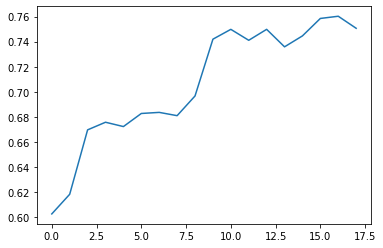

In [103]:
pd.Series(sig1).plot()

In [180]:
for i in range(len(sig1)):
    if sig1[i] == max(sig1):
        pointer = " <-- max value"
    else:
        pointer = ""
    print(str(i) + ': ' + str(sig1[i]) + pointer)

0: 0.6024615628274165
1: 0.6181410053361273
2: 0.6695530079676422
3: 0.6756444774737458
4: 0.6721875685290319
5: 0.6826374844667528
6: 0.6835055188713726
7: 0.6808861869837479
8: 0.6966143612485076
9: 0.7419409858434249
10: 0.7497898443020394
11: 0.7410577227650399
12: 0.7497898443020394
13: 0.7358312419288029
14: 0.7445664092005555
15: 0.7584884627567554
16: 0.7602488974440194 <-- max value
17: 0.7506396042981409


In [184]:
print(sig1[10])
feature_impt = sig_col1[0:11]

0.7497898443020394



### Brute-force Feature Extraction

In [105]:
import numpy as np
from itertools import combinations
import random

In [106]:
def find_intersect(list1, list2):
    return set(list1) - set(list2)

In [107]:
def rSubset(list_, r): 
    return list(combinations(list_, r)) 

In [108]:
F0 = F1 = F2 = F3 = F4 = F5 = F6 = F7 = F8 = F9 = F10 = F11 = F12 = [] 
F13 = F14 = F15 = F16 = F17 = []

F = [F0, F1, F2, F3, F4, F5, F6, F7, F8, F9,
     F10, F11, F12, F13, F14, F15, F16, F17]

In [109]:
for i in range(len(F)):
    for j in rSubset(X, i):
        F[i].append(list(j))

In [110]:
def rand_n(list, n):
    xor = np.array(list)
    indices = np.arange(len(xor))
    rnd_indices = np.random.choice(indices, size=n)
    return xor[rnd_indices].tolist()

In [111]:
f1 = rand_n(F1, 10)
f2 = rand_n(F2, 50)
f3 = rand_n(F3, 50)
f4 = rand_n(F4, 50)
f5 = rand_n(F5, 50)
f6 = rand_n(F6, 50)
f7 = rand_n(F7, 100)
f8 = rand_n(F8, 100)
f9 = rand_n(F9, 100)
f10 = rand_n(F10, 100)
f11 = rand_n(F11, 100)
f12 = rand_n(F12, 50)
f13 = rand_n(F13, 50)
f14 = rand_n(F14, 50)
f15 = rand_n(F15, 50)
f16 = rand_n(F16, 10)

In [112]:
my_evaluate1 = []

for ele in f1:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate1.append(mlp_scores.mean())

In [113]:
my_evaluate2 = []

for ele in f2:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate2.append(mlp_scores.mean())

In [114]:
my_evaluate3 = []

for ele in f3:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                                 scoring='f1_macro')
    my_evaluate3.append(mlp_scores.mean())

In [115]:
my_evaluate4 = []

for ele in f4:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate4.append(mlp_scores.mean())

In [116]:
my_evaluate5 = []

for ele in f5:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate5.append(mlp_scores.mean())

In [117]:
my_evaluate6 = []

for ele in f6:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate6.append(mlp_scores.mean())

In [118]:
my_evaluate7 = []

for ele in f7:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate7.append(mlp_scores.mean())

c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
my_evaluate8 = []

for ele in f8:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate8.append(mlp_scores.mean())

c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [120]:
my_evaluate9 = []

for ele in f9:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate9.append(mlp_scores.mean())

In [121]:
my_evaluate10 = []

for ele in f10:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate10.append(mlp_scores.mean())

In [122]:
my_evaluate11 = []

for ele in f11:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate11.append(mlp_scores.mean())

c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged 

In [123]:
my_evaluate12 = []

for ele in f12:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate12.append(mlp_scores.mean())

c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [124]:
my_evaluate13 = []

for ele in f13:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate13.append(mlp_scores.mean())

c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [125]:
my_evaluate14 = []

for ele in f14:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=1000)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate14.append(mlp_scores.mean())

In [126]:
my_evaluate15 = []

for ele in f15:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate15.append(mlp_scores.mean())

c:\users\isada\workspace\a\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [127]:
my_evaluate16 = []

for ele in f16:
    mlp_zac = MLPClassifier(activation='tanh', max_iter=500)
    mlp_scores = cross_val_score(mlp_zac, X[ele], y, cv=4,
                             scoring='f1_macro')
    my_evaluate16.append(mlp_scores.mean())

In [128]:
print(max(my_evaluate1))
print(max(my_evaluate2))
print(max(my_evaluate3))
print(max(my_evaluate4))
print(max(my_evaluate5))
print(max(my_evaluate6))
print(max(my_evaluate7))
print(max(my_evaluate8))
print(max(my_evaluate9))
print(max(my_evaluate10))
print(max(my_evaluate11))
print(max(my_evaluate12))
print(max(my_evaluate13))
print(max(my_evaluate14))
print(max(my_evaluate15))
print(max(my_evaluate16))

0.7543284384252273
0.7658238235708706
0.7645026583515503
0.7670800324707084
0.7688086028398187
0.7724145222657142
0.7704166506496422
0.7653919274512421
0.7676961913072552
0.7722500372760454
0.7757396361984448
0.7667860756266215
0.7828315072261525
0.772380488998214
0.7737068494218939
0.7660578629682984


In [185]:
def print_evluation(evaluate):
    index = np.array(evaluate).argmax(axis=0)
    print(evaluate[index])
    print(f7[index])

In [186]:
index = np.array(my_evaluate10).argmax(axis=0)
print(my_evaluate10[index])
list_10 = f10[index]
list_7 = f7[index]
print(f10[index])

0.7722500372760454
['ps', 'nma.a', 'nma.b', 'nma.c', 'nma.d', 'nex.a', 'nex.d', 'nex.e', 'nex.g', 'nex.f', 'dd', 'dm']


In [187]:
print(find_intersect(list_7,list_10))
find_intersect(list_10,list_7)

{'nex.c', 'nma.f'}


{'dm', 'nex.a', 'nex.d', 'nex.e', 'nma.a', 'nma.b'}

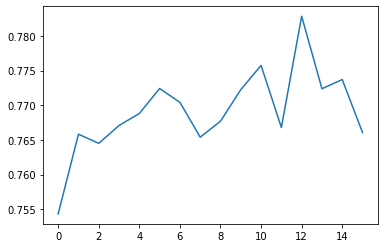

In [188]:
results = [max(my_evaluate1),
           max(my_evaluate2),
          max(my_evaluate3),
          max(my_evaluate4),
          max(my_evaluate5),
          max(my_evaluate6),
          max(my_evaluate7),
          max(my_evaluate8),
          max(my_evaluate9),
          max(my_evaluate10),
          max(my_evaluate11),
          max(my_evaluate12),
          max(my_evaluate13),
          max(my_evaluate14),
          max(my_evaluate15),
          max(my_evaluate16),]
plt.plot(results)
plt.show()

In [189]:
my_evaluate12

[0.6292149499901963,
 0.7207350636388331,
 0.6470787217019407,
 0.7090515649128026,
 0.7423017187875777,
 0.6979726545173235,
 0.6586492293357206,
 0.7202666299151876,
 0.7609707769631867,
 0.6531234128717441,
 0.7100209783863681,
 0.7529708671234361,
 0.6553274124991074,
 0.7236610135112933,
 0.7035381090946857,
 0.7478594976315596,
 0.7667860756266215,
 0.6539825955686762,
 0.7064766463270988,
 0.7451544932508037,
 0.6233436103399304,
 0.630827504212109,
 0.7439972716307557,
 0.7365601840353059,
 0.7350979046832307,
 0.6625471347227883,
 0.7436705404013666,
 0.764489420615952,
 0.7432684504195205,
 0.6627542666731263,
 0.7451624238263174,
 0.6320455079594665,
 0.6195314230173403,
 0.6319879620134099,
 0.754400534597599,
 0.7426599743441985,
 0.7492637771072548,
 0.6452240620558606,
 0.6649922919328348,
 0.7067483807685949,
 0.6282455797895078,
 0.7545480641038251,
 0.7519878069012009,
 0.6754099427191164,
 0.6879461612500111,
 0.7583917313046316,
 0.7133779716604332,
 0.7585706774742

In [190]:
for i in range(len(my_evaluate12)):
    if my_evaluate12[i] == max(my_evaluate12):
        iindex = i
brutal_feature = f12[iindex]

In [191]:
brutal_feature

['ps',
 'nma.a',
 'nma.b',
 'nma.c',
 'nex.a',
 'nex.c',
 'nex.e',
 'nex.g',
 'nex.f',
 'nex.h',
 'dd']

c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\isada\workspace\a\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


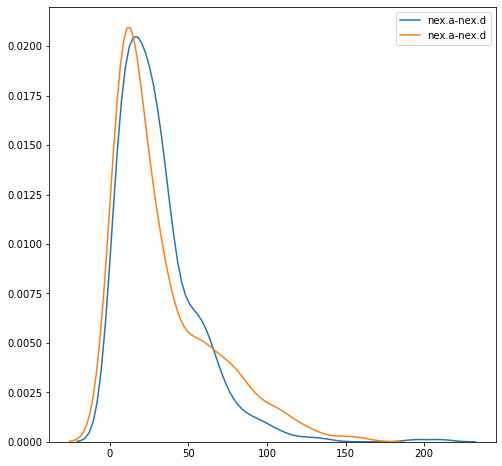

In [192]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(df_2[df_new['golds'] == 0]['nex.a-nex.d'])
ax = sns.kdeplot(df_2[df_new['golds'] == 1]['nex.a-nex.d'])

In [193]:
all_ =[]
korn =[]
por =[]
max_iter = 1000
n = 5
for i in range(n):
    mlp_zac = MLPClassifier(activation='tanh', max_iter=max_iter) # all
    mlp_scores = cross_val_score(mlp_zac, X, y, cv=4, scoring='f1_macro')
    all_.append(mlp_scores.mean())
    mlp_zac = MLPClassifier(activation='tanh', max_iter=max_iter) # brutal-f
    mlp_scores = cross_val_score(mlp_zac, X[brutal_feature], y,
                               cv=4, scoring='f1_macro')
    korn.append(mlp_scores.mean())
    mlp_zac = MLPClassifier(activation='tanh', max_iter=max_iter) #f-impt
    mlp_scores = cross_val_score(mlp_zac, X[feature_impt], y,
                               cv=4, scoring='f1_macro')
    por.append(mlp_scores.mean())

In [194]:
print("All features")
print("f1_micro-score: " + str(np.mean(all_)))
print("Filtered features(Brute-force), columns=" + str(brutal_feature))
print("f1_micro-score: " + str(np.mean(korn)))
print("Filtered features(sklearn importance_feature), columns="
      + str(list(feature_impt)))
print("f1_micro-score: " + str(np.mean(por)))

All features
f1_micro-score: 0.7602203686194443
Filtered features(Brute-force), columns=['ps', 'nma.a', 'nma.b', 'nma.c', 'nex.a', 'nex.c', 'nex.e', 'nex.g', 'nex.f', 'nex.h', 'dd']
f1_micro-score: 0.7650468320011635
Filtered features(sklearn importance_feature), columns=['nma.a', 'nex.f', 'nex.a', 'dd', 'nex.b', 'nex.c', 'nex.d', 'dm', 'nma.f', 'nma.d', 'nma.e']
f1_micro-score: 0.7415003779862172


____

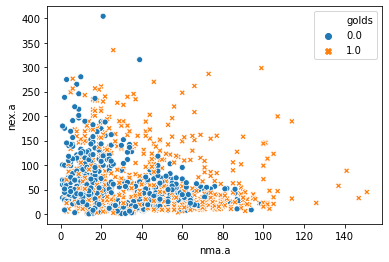

In [195]:
ax = sns.scatterplot(x='nma.a', y='nex.a',hue="golds",
                     style="golds", data=df_new)

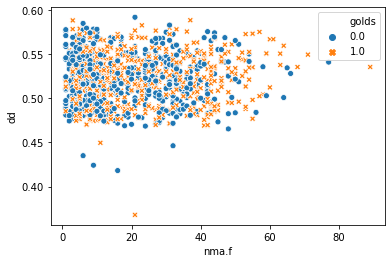

In [196]:
ax = sns.scatterplot(x='nma.f', y='dd',hue="golds",
                     style="golds", data=df_new)

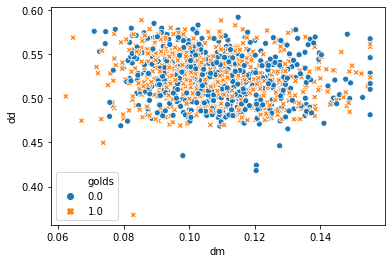

In [197]:
ax = sns.scatterplot(x='dm', y='dd',hue="golds",
                     style="golds", data=df_new)

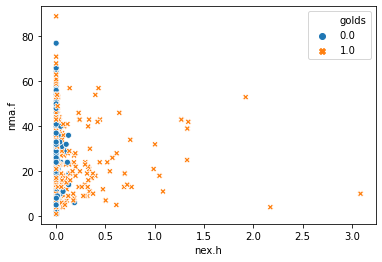

In [198]:
ax = sns.scatterplot(x='nex.h', y='nma.f',hue="golds",
                     style="golds", data=df_new)

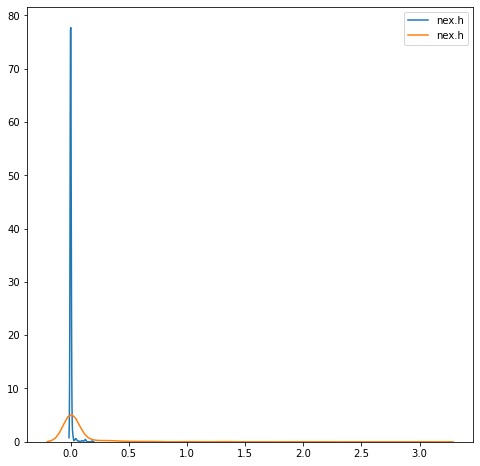

In [199]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(df_new[df_new['golds'] == 0]['nex.h'])
ax = sns.kdeplot(df_new[df_new['golds'] == 1]['nex.h'])

In [200]:
mlp = MLPClassifier(activation='tanh', max_iter=500)
mlp.fit(X_train[brutal_feature], y_train)
y_hat_mlp = mlp.predict(X_test[brutal_feature])
print(classification_report(y_test, y_hat_mlp))

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       136
         1.0       0.79      0.73      0.76       150

    accuracy                           0.76       286
   macro avg       0.76      0.76      0.76       286
weighted avg       0.76      0.76      0.76       286



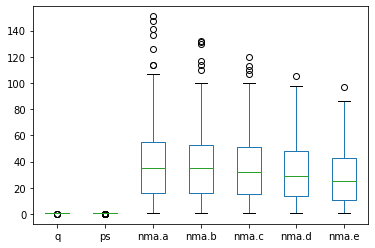

In [201]:
df_1[df_1.columns[:7]].plot(kind='box',stacked=True)

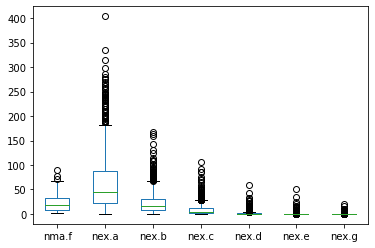

In [202]:
df_1[df_1.columns[7:14]].plot(kind='box',stacked=True)

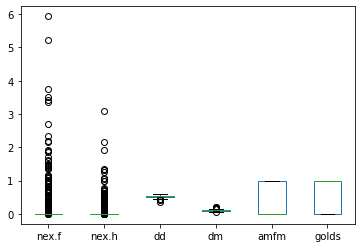

In [203]:
df_1[df_1.columns[14:]].plot(kind='box',stacked=True)